In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import os

%matplotlib inline

In [105]:
df = pd.read_csv('data/BTC.csv', index_col='Date', parse_dates=True, na_values=[np.nan])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [106]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [107]:
series = df['Close']

In [108]:
from statsmodels.tsa.stattools import adfuller
X = series.values

series_log = np.log(X)

In [109]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.085475
p-value: 0.720829
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


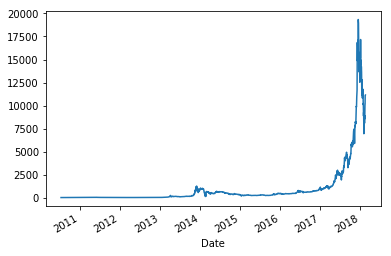

In [110]:
series.plot()

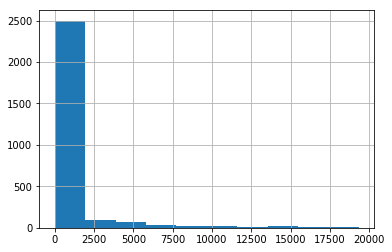

In [111]:
series.hist()

In [112]:
series_log.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [113]:
df_returns = df['Close'].pct_change()

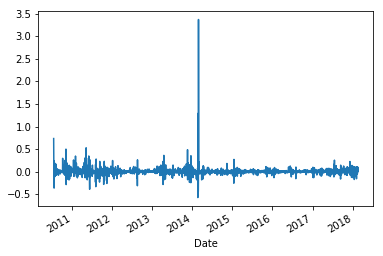

In [114]:
df_returns.plot()

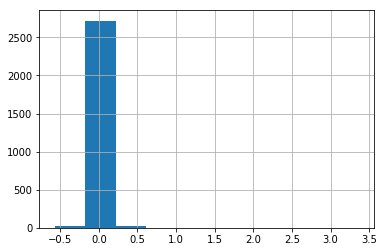

In [115]:
df_returns.hist()

In [116]:
def test_station(X):
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [117]:
df_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
df_returns.dropna(inplace=True)

In [118]:
test_station(df_returns)

ADF Statistic: -17.480147
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


/home/parafa/off/tw/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  """Entry point for launching an IPython kernel.


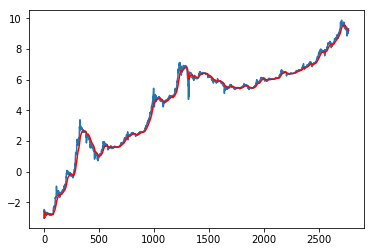

In [119]:
expwighted_avg = pd.ewma(series_log, halflife=12)
plt.plot(series_log)
plt.plot(expwighted_avg, color='red')

In [120]:
ts_log_ewma_diff = series_log - expwighted_avg
test_station(ts_log_ewma_diff)

ADF Statistic: -7.741440
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [121]:
from statsmodels.tsa.arima_model import ARIMA

In [103]:
df_returns = ts_log_ewma_diff

/home/parafa/off/tw/env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/parafa/off/tw/env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/parafa/off/tw/env/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/parafa/off/tw/env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second arg

Text(0.5,1,'RSS: nan')

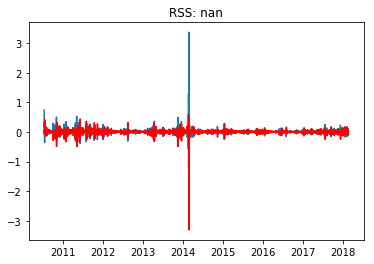

In [122]:
model = ARIMA(df_returns, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_returns)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_returns)**2))